In [1]:
import pandas as pd
import numbers as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib

sns.set_style("whitegrid")

In [2]:
df = pd.read_parquet('../assets/SINAN-TB_Brazil_cleaned.parquet')

In [3]:
df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,06/01/2001,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,16/01/2001,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,16/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,22/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,03/01/2001,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DT_NOTIFIC          963961 non-null  object 
 1   CS_SEXO             963961 non-null  object 
 2   CS_RACA             963961 non-null  object 
 3   TRATAMENTO          963961 non-null  object 
 4   RAIOX_TORA          963961 non-null  object 
 5   TESTE_TUBE          963961 non-null  object 
 6   FORMA               963961 non-null  object 
 7   AGRAVAIDS           963961 non-null  object 
 8   AGRAVALCOO          963961 non-null  object 
 9   AGRAVDIABE          963961 non-null  object 
 10  AGRAVDOENC          963961 non-null  object 
 11  AGRAVOUTRA          963961 non-null  object 
 12  BACILOSC_E          963961 non-null  object 
 13  BACILOS_E2          963961 non-null  object 
 14  BACILOSC_O          963961 non-null  object 
 15  CULTURA_ES          963961 non-nul

In [5]:
df['IDADE'] = df['IDADE'].astype('int')

In [6]:
df['IDADE'].head(2)

0    66
1    35
Name: IDADE, dtype: int64

In [7]:
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], dayfirst=True)

df['DAY'] = df['DT_NOTIFIC'].dt.day
df['MONTH'] = df['DT_NOTIFIC'].dt.month
df['YEAR'] = df['DT_NOTIFIC'].dt.year
df = df.drop('DT_NOTIFIC', axis=1)

In [8]:
df.head(2)

,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,...,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE,DAY,MONTH,YEAR
0,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,195,66,6,1,2001
1,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,181,35,16,1,2001


In [9]:
numeric_features = df.select_dtypes(include='number')
categorical_features = df.select_dtypes(include='object')
categorical_features.info()
# defining two variables for numerical and categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CS_SEXO     963961 non-null  object
 1   CS_RACA     963961 non-null  object
 2   TRATAMENTO  963961 non-null  object
 3   RAIOX_TORA  963961 non-null  object
 4   TESTE_TUBE  963961 non-null  object
 5   FORMA       963961 non-null  object
 6   AGRAVAIDS   963961 non-null  object
 7   AGRAVALCOO  963961 non-null  object
 8   AGRAVDIABE  963961 non-null  object
 9   AGRAVDOENC  963961 non-null  object
 10  AGRAVOUTRA  963961 non-null  object
 11  BACILOSC_E  963961 non-null  object
 12  BACILOS_E2  963961 non-null  object
 13  BACILOSC_O  963961 non-null  object
 14  CULTURA_ES  963961 non-null  object
 15  HIV         963961 non-null  object
 16  RIFAMPICIN  963961 non-null  object
 17  ISONIAZIDA  963961 non-null  object
 18  ETAMBUTOL   963961 non-null  object
 19  ESTREPTOMI  963961 non-

In [10]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_fit = [(feature, LabelEncoder().fit(df[feature])) for feature in categorical_features]

joblib.dump(labelEncoder_fit, '../assets/labelEncoder_fit.jbl')
# exporting the fitted features from the data tu use later on
# the deployed model

for feature, fit in labelEncoder_fit:
  df[feature] = fit.transform(df[feature])
  # transforming the categorical features from string to 1,2,3...

df.head()

,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,...,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE,DAY,MONTH,YEAR
0,1,2,2,4,2,2,0,0,0,0,...,3,0,0,0,0,195,66,6,1,2001
1,0,0,2,4,2,2,0,0,0,0,...,3,0,0,0,0,181,35,16,1,2001
2,1,0,2,4,2,2,0,0,0,0,...,3,0,0,0,0,181,54,16,1,2001
3,1,0,2,4,2,2,0,0,0,0,...,3,0,0,0,0,181,36,22,1,2001
4,0,2,2,1,2,2,0,0,0,0,...,3,0,0,0,0,183,14,3,1,2001


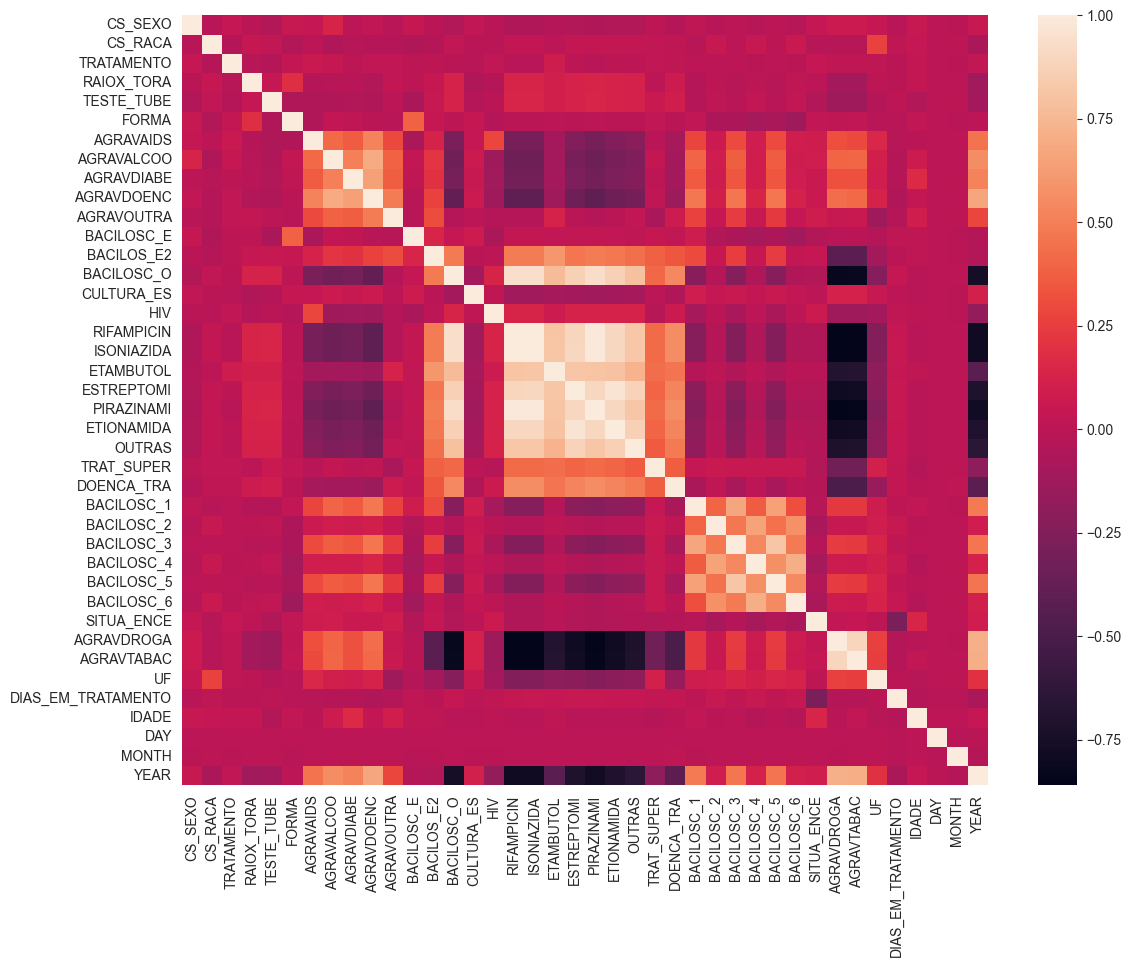

In [11]:
fig, ax = plt.subplots(figsize=(13,10))

ax = sns.heatmap(df.corr(numeric_only=True))

plt.show()

In [12]:
for feature in categorical_features.columns:
  df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CS_SEXO             963961 non-null  category
 1   CS_RACA             963961 non-null  category
 2   TRATAMENTO          963961 non-null  category
 3   RAIOX_TORA          963961 non-null  category
 4   TESTE_TUBE          963961 non-null  category
 5   FORMA               963961 non-null  category
 6   AGRAVAIDS           963961 non-null  category
 7   AGRAVALCOO          963961 non-null  category
 8   AGRAVDIABE          963961 non-null  category
 9   AGRAVDOENC          963961 non-null  category
 10  AGRAVOUTRA          963961 non-null  category
 11  BACILOSC_E          963961 non-null  category
 12  BACILOS_E2          963961 non-null  category
 13  BACILOSC_O          963961 non-null  category
 14  CULTURA_ES          963961 non-null  category
 15  HIV              

In [13]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler_fit = [(feature, MinMaxScaler().fit(df[feature].values.reshape(-1,1))) for feature in numeric_features]

joblib.dump(minMaxScaler_fit, '../assets/minMaxScaler_fit.jbl')
# exporting the fitted features from the data tu use later on
# the deployed model

for feature, scaler in minMaxScaler_fit:
  df[feature] = scaler.transform(df[feature].values.reshape(-1,1))

df.head()

,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,...,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE,DAY,MONTH,YEAR
0,1,2,2,4,2,2,0,0,0,0,...,3,0,0,0,0,0.039723,0.550000,0.166667,0.0,0.0
1,0,0,2,4,2,2,0,0,0,0,...,3,0,0,0,0,0.036871,0.291667,0.500000,0.0,0.0
2,1,0,2,4,2,2,0,0,0,0,...,3,0,0,0,0,0.036871,0.450000,0.500000,0.0,0.0
3,1,0,2,4,2,2,0,0,0,0,...,3,0,0,0,0,0.036871,0.300000,0.700000,0.0,0.0
4,0,2,2,1,2,2,0,0,0,0,...,3,0,0,0,0,0.037278,0.116667,0.066667,0.0,0.0


In [14]:
df.describe()

,DIAS_EM_TRATAMENTO,IDADE,DAY,MONTH,YEAR
count,963961.000000,963961.000000,963961.000000,963961.000000,963961.000000
mean,0.041741,0.331717,0.494321,0.491286,0.496994
std,0.021073,0.142371,0.290289,0.309241,0.284590
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036871,0.216667,0.233333,0.181818,0.263158
50%,0.038704,0.316667,0.500000,0.454545,0.526316
75%,0.045019,0.433333,0.733333,0.727273,0.736842
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop(['SITUA_ENCE'], axis=1)
y = df['SITUA_ENCE']

In [17]:
y.value_counts()

0    927777
1     36184
Name: SITUA_ENCE, dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.05, random_state=0)

In [40]:
print(f"""
x_train: {x_train.shape} | y_train: {y_train.shape}
x_test: {x_test.shape} | y_test: {y_test.shape}
""")
# Seeing the train and test sizes


x_train: (915762, 39) | y_train: (915762,)
x_test: (48199, 39) | y_test: (48199,)



In [41]:
y_train.value_counts()

0    881384
1     34378
Name: SITUA_ENCE, dtype: int64

In [42]:
from imblearn.under_sampling import RandomUnderSampler

randomUnderSampler = RandomUnderSampler()

In [43]:
x_train, y_train = randomUnderSampler.fit_resample(x_train, y_train)
y_train.value_counts()
# perfect balance!

0    34378
1    34378
Name: SITUA_ENCE, dtype: int64

In [44]:
print(f"""
x_train: {x_train.shape} | y_train: {y_train.shape}
x_test: {x_test.shape} | y_test: {y_test.shape}
""")
# Seeing the train and test sizes


x_train: (68756, 39) | y_train: (68756,)
x_test: (48199, 39) | y_test: (48199,)



In [45]:
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score

In [46]:
model = lgbm.LGBMClassifier(seed=0, objective='binary')

In [47]:
cross_val_score(model, x_train, y_train, cv=5).mean()

0.9393943489815051

In [48]:
from sklearn import metrics

In [49]:
model.fit(x_train, y_train)

LGBMClassifier(objective='binary', seed=0)

In [50]:
y_predict = model.predict(x_test)
y_predict_proba = model.predict_proba(x_test)

In [51]:
y_predict[:5]

array([0, 0, 0, 0, 0])

In [52]:
y_predict_proba[:5]

array([[0.99332194, 0.00667806],
       [0.99507643, 0.00492357],
       [0.86676732, 0.13323268],
       [0.98823979, 0.01176021],
       [0.98419555, 0.01580445]])

In [53]:
y_test[:5]

401131    0
154897    0
355211    0
531647    0
305762    0
Name: SITUA_ENCE, dtype: category
Categories (2, int64): [0, 1]

In [54]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     46393
           1       0.41      0.93      0.57      1806

    accuracy                           0.95     48199
   macro avg       0.70      0.94      0.77     48199
weighted avg       0.98      0.95      0.96     48199



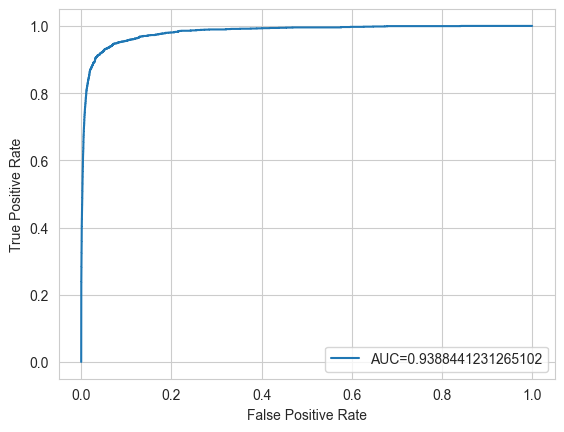

In [55]:
false_positive_roc, true_positive_roc, _ = metrics.roc_curve(y_test, y_predict_proba[:,1])
roc_auc_score = metrics.roc_auc_score(y_test, y_predict)

plt.plot(false_positive_roc,true_positive_roc,label="AUC="+str(roc_auc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# seeing the results with the AUC ROC curve

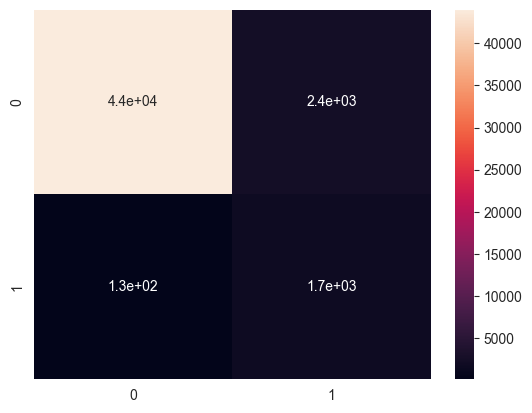

In [56]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)
plt.show()
# seeing the results with the confusion matrix

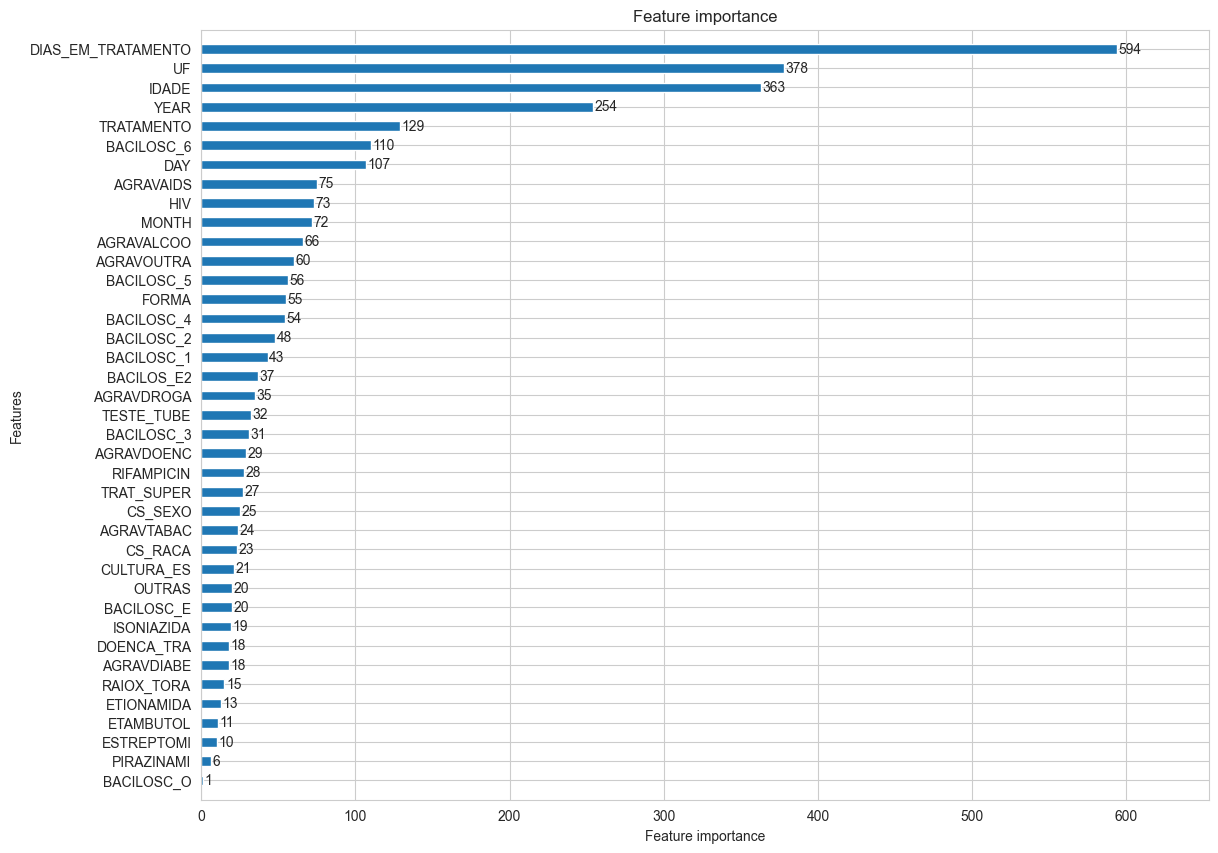

In [57]:
ax, fig = plt.subplots(figsize=(13,10))
fig = lgbm.plot_importance(model, height=.5, ax=fig)

plt.show()

In [58]:
fig = fig.figure
fig.savefig('../assets/graphs/feature-importance.png', dpi=300, bbox_inches='tight')
# saving this plot to use in the streamlit front-end application

In [59]:
joblib.dump(model, '../assets/model.jbl')
# saving our final model to use in out deploy application

['../assets/model.jbl']